## Libraries

In [ ]:
!pip install --upgrade dcor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 512.8 kB/s eta 0:00:00


In [ ]:
!pip install minepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=187016 sha256=26fe05cf02affef9292e04cf403cf921946966663b77c145c2fc64af19fed9dd
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
Successfully built minepy


In [ ]:
import numpy as np
import pandas as pd
import random

#saves variables
import pickle
#saves into files
from numpy import savetxt

# # MIC correlation
# from minepy import MINE

# # distance correlation
# import dcor
from scipy.spatial.distance import correlation


import matplotlib.pyplot  as plt
import seaborn as sns
# sns.set()

# LSTM
from keras import metrics
import keras
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc

from scipy.stats import multivariate_normal

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import sys
# Append the directory to your python path using sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Correlation-Based-AD-HAI-HIL dataset ')
import model128
from model128 import ADClass

## Import Data

In [ ]:

dataset_path = '/content/drive/My Drive/Colab Notebooks/'
 # dataset_path = 'dataset/'
HAI_attack = 'test1.xlsx'
HAI_normal_v1= 'train1.xlsx'



In [ ]:
AD_normal = ADClass(dataset_path)
AD_attack = ADClass(dataset_path)

In [ ]:
# import normal data
df = AD_normal.importDataset(file_name = HAI_normal_v1, nb_rows = 0)

In [ ]:
# Get first n rows using values[] attribute
df = df.iloc[:20000]

In [ ]:
df.head()

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32,0.0,28.9981,35.7395,0.0,...,64.4604,57.8704,395.0195,-0.0004,330.6568,328.9388,50.9871,9973,27629,normal
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32,0.0,29.9914,35.7388,0.0,...,64.7208,58.4853,398.3109,-0.0012,330.2228,329.3728,50.9871,9973,27629,normal
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32,0.0,27.0122,35.7399,0.0,...,64.9450,59.2629,397.8768,0.0018,332.0493,329.7526,50.9871,9973,27629,normal
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32,0.0,32.9705,35.7452,0.0,...,65.1620,59.8235,398.6364,0.0033,331.5249,331.0547,50.9871,9973,27629,normal
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32,0.0,30.9843,35.7422,0.0,...,65.4369,60.3118,401.2406,0.0015,333.1706,331.1631,50.9871,9973,27629,normal


In [ ]:
df['attack'].nunique()

1

In [ ]:
# import attack data
df_an = AD_attack.importDataset(file_name = HAI_attack, nb_rows = 0)

In [ ]:
# df_an=df_an.sample(frac=0.4, replace=True, random_state=1)
df_an = df_an.iloc[:20000]

In [ ]:
df_an.shape

(20000, 54)

In [ ]:
df_an.head(3)

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,2019-10-29 11:00:00,0.0982,1.4610,461.9883,1099.7363,32.0,0.0,113.4112,35.9070,9.2526,...,70.2402,67.2924,426.6312,-0.0027,355.4688,349.6998,0,10053.0,27629,normal
1,2019-10-29 11:00:01,0.0982,1.4578,461.9883,1099.7363,32.0,0.0,116.3903,35.8990,9.2161,...,70.3776,67.6722,426.5046,-0.0020,356.8432,349.8625,0,10053.0,27629,normal
2,2019-10-29 11:00:02,0.0982,1.4666,461.9883,1099.7363,32.0,0.0,116.3903,35.9211,9.8404,...,70.5295,67.9073,427.9875,-0.0019,357.1868,350.4413,0,10053.0,27629,normal


In [ ]:
df_an['attack'].nunique()


3

### Split data

In [ ]:
# Split data from labels
x_n, y_n = AD_normal.splitDataset(df)

In [ ]:
x_n_an, y_n_an = AD_attack.splitDataset(df_an)

In [ ]:
# remove date column
x_n.drop('time', axis=1, inplace=True)

In [ ]:
x_n_an.drop('time', axis=1, inplace=True)

# EDA

<ipython-input-22-00697c75cf0b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s = sns.heatmap(df.corr(),


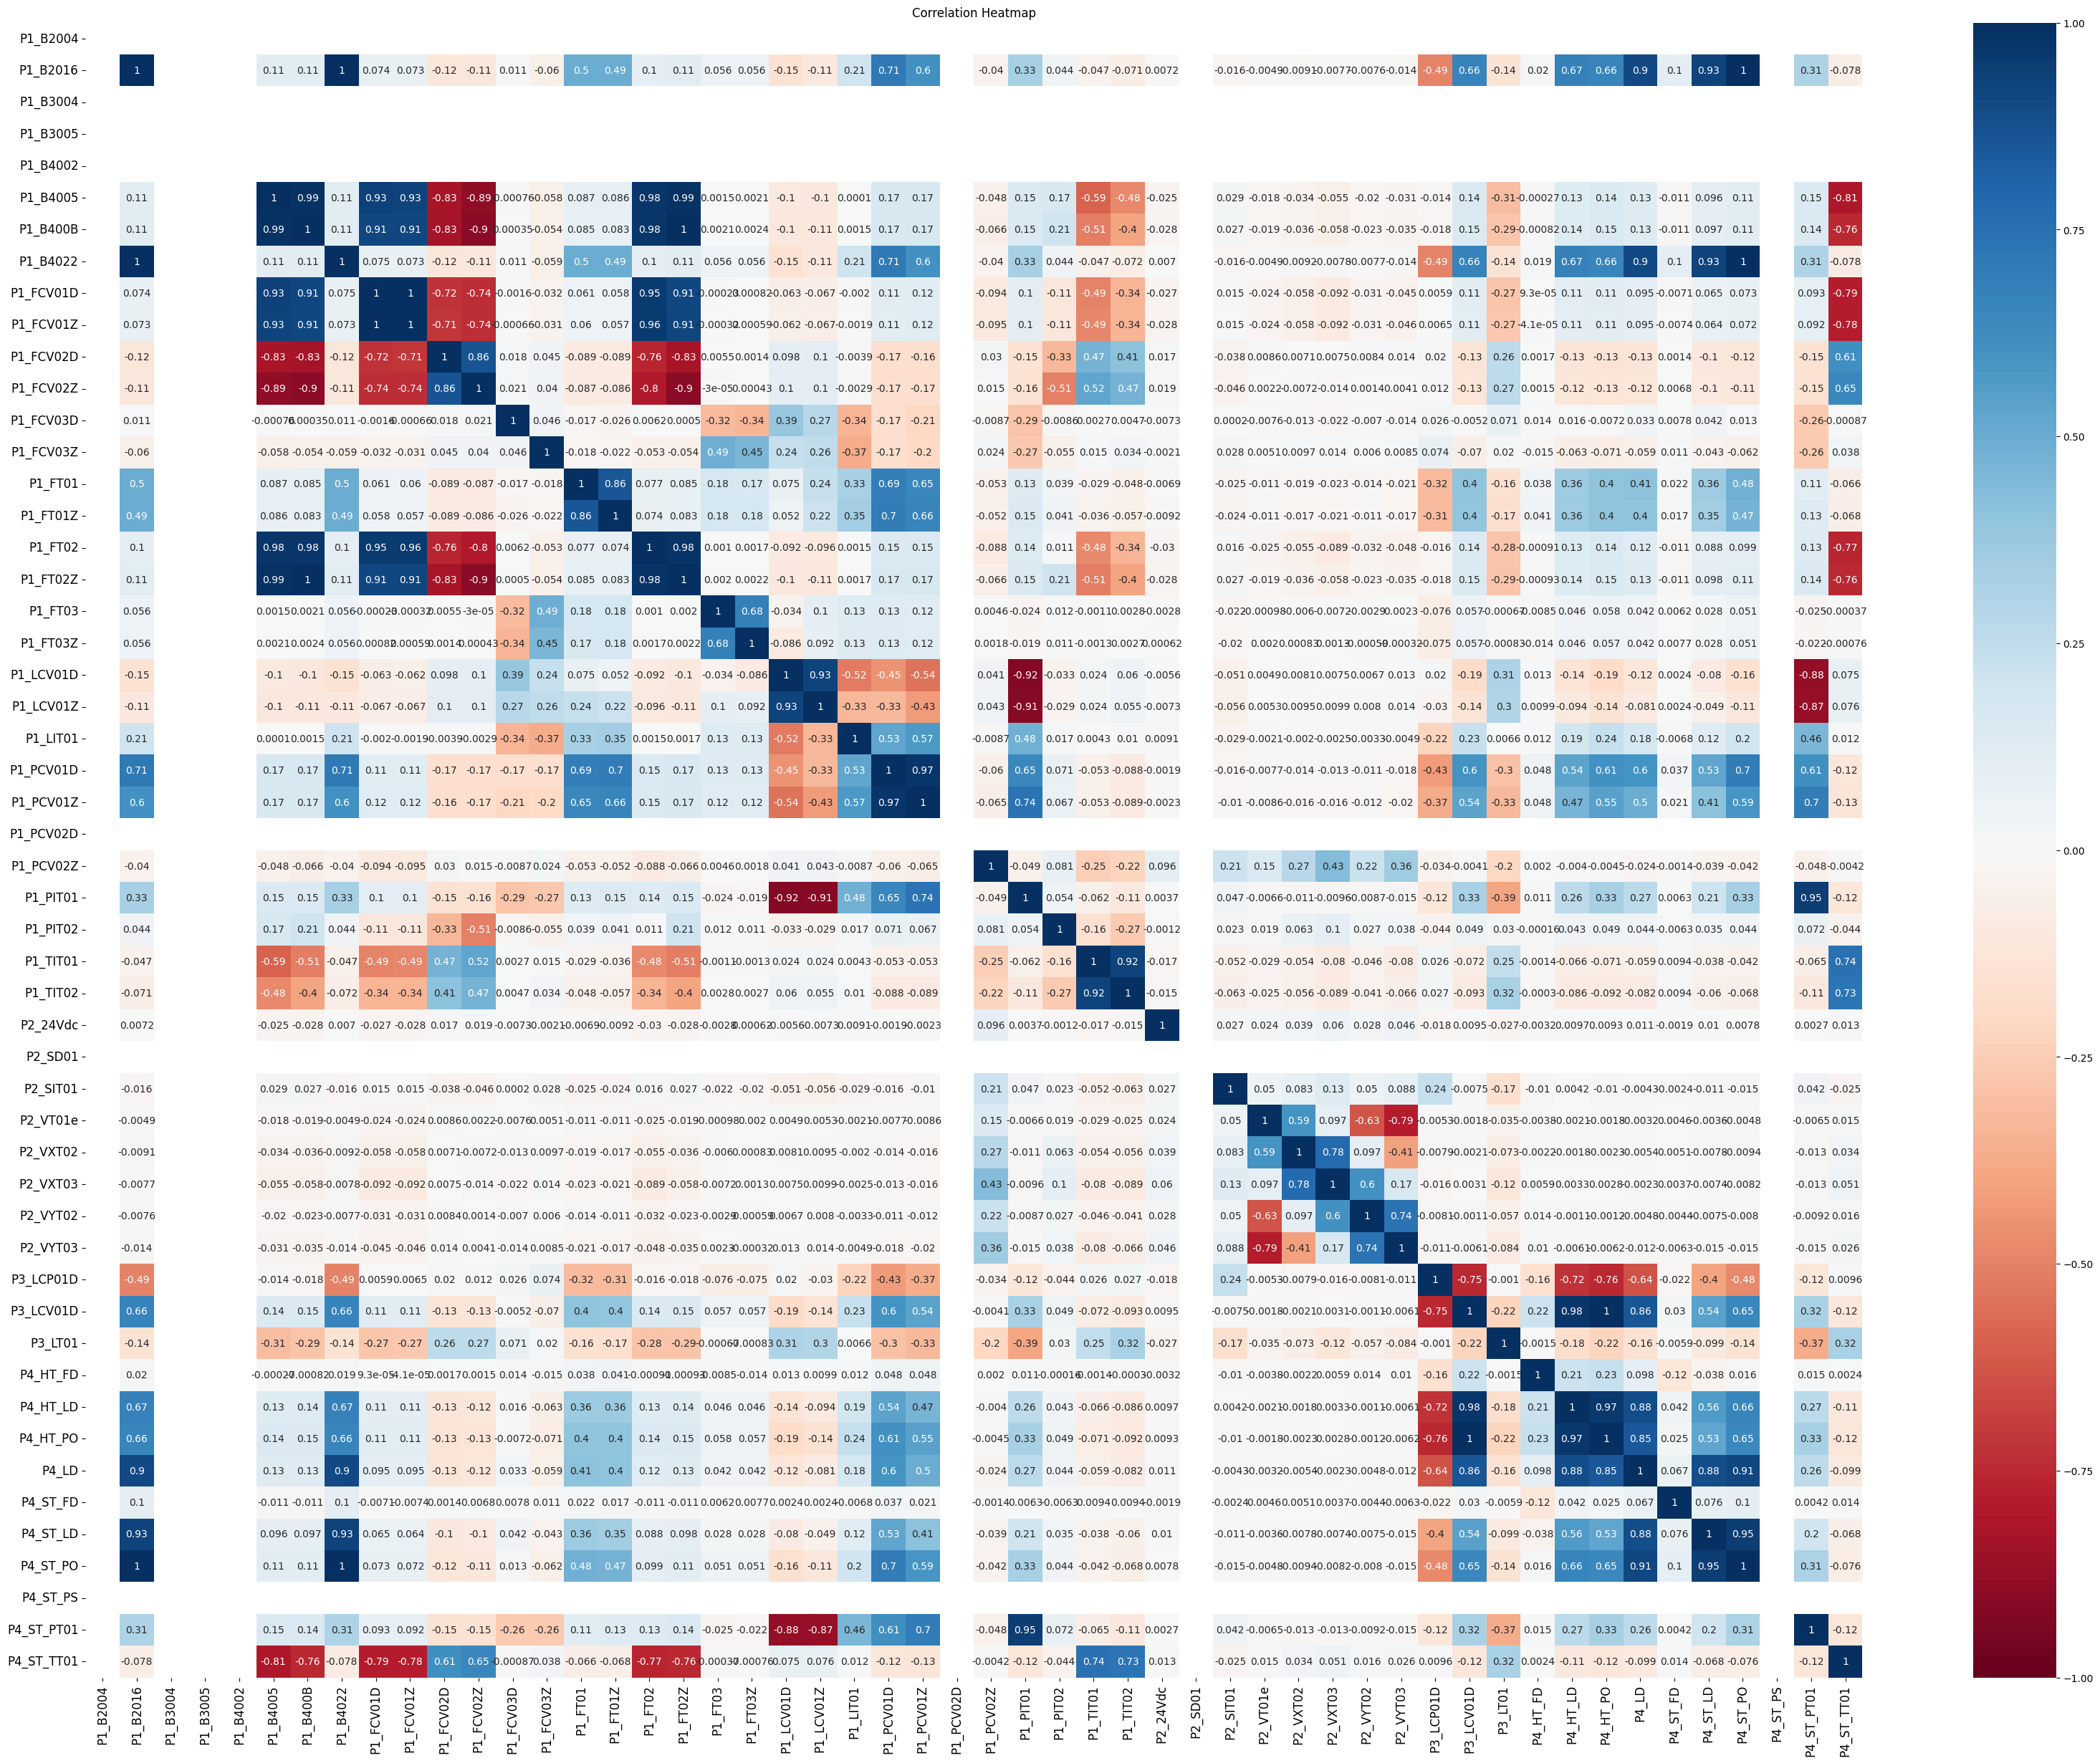

In [ ]:
# Create correlation matrix
corr_mat = x_n_an.corr(method='pearson')

# Print the graph
plt.figure(figsize = (40, 30))
s = sns.heatmap(df.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

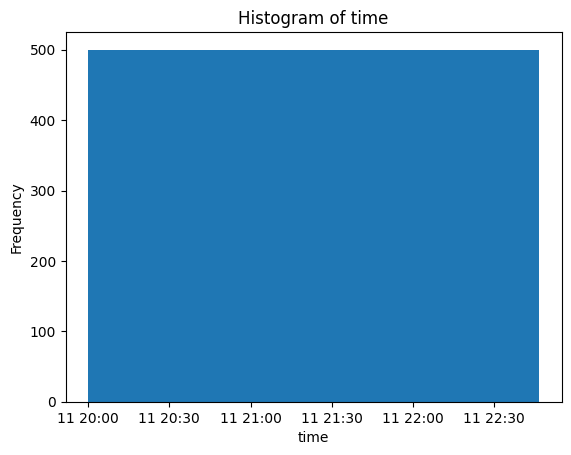

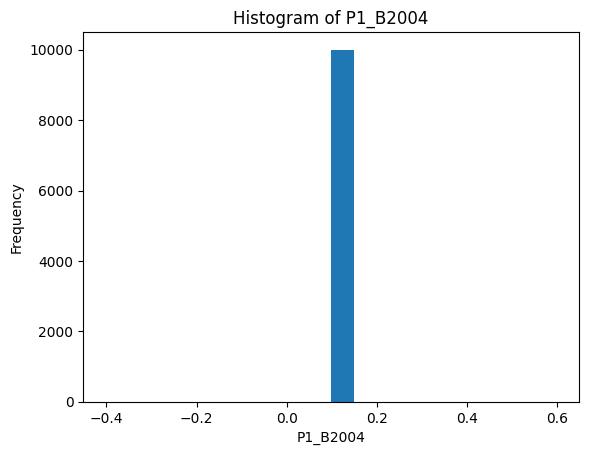

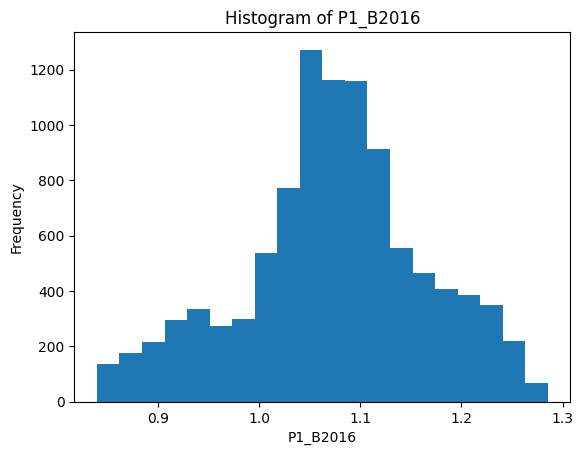

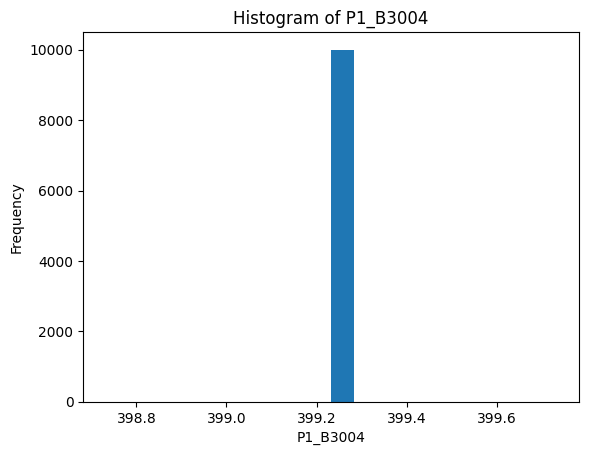

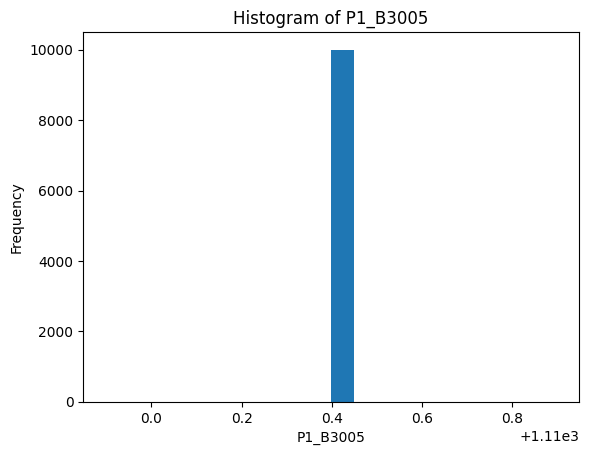

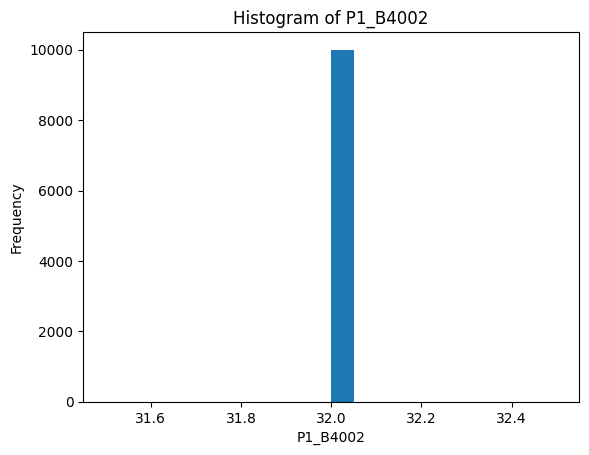

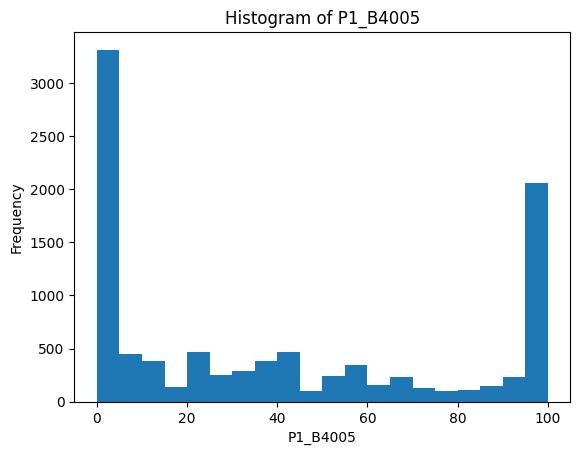

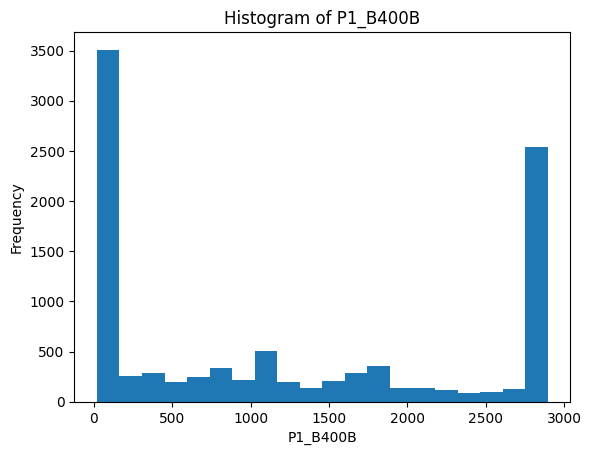

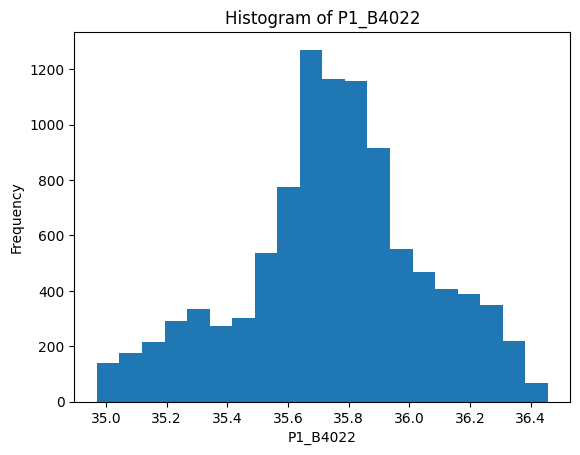

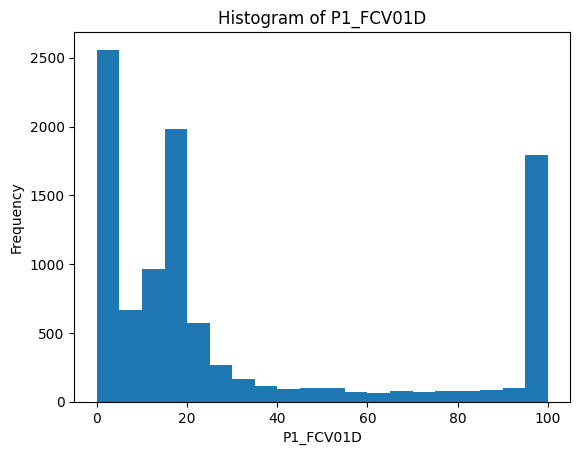

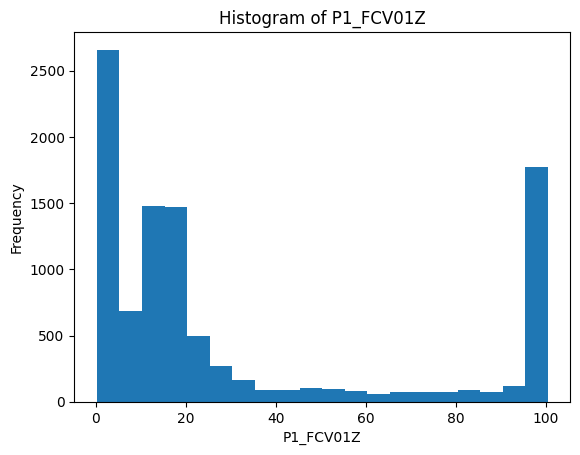

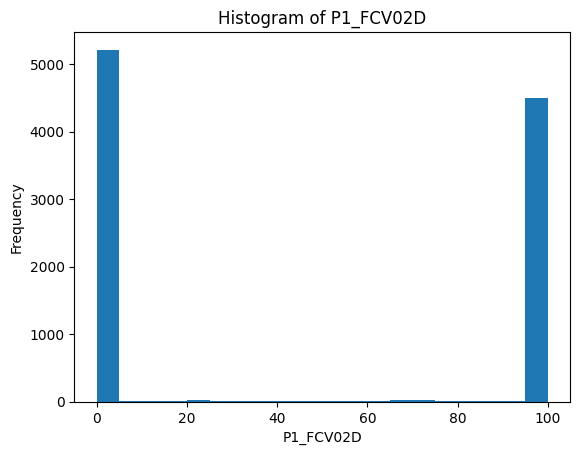

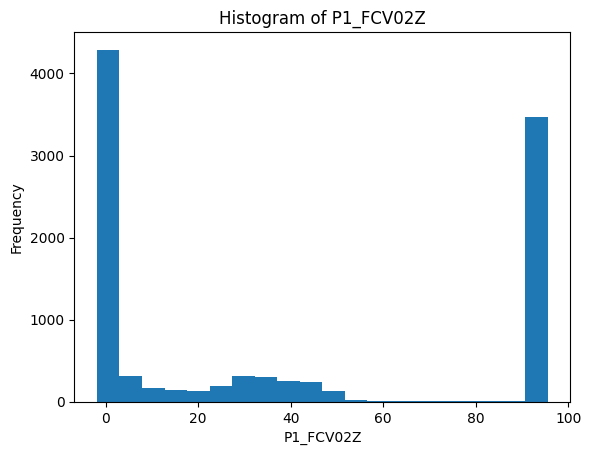

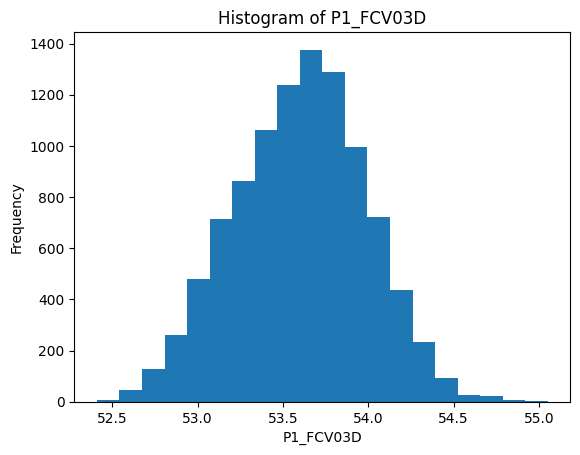

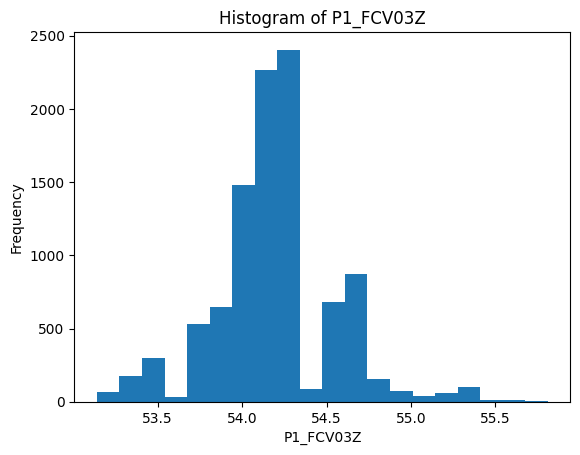

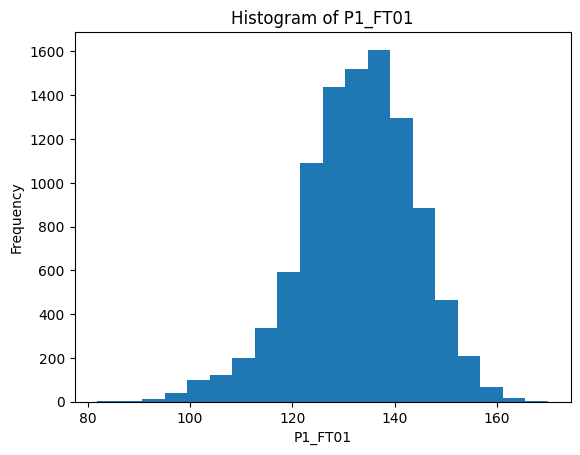

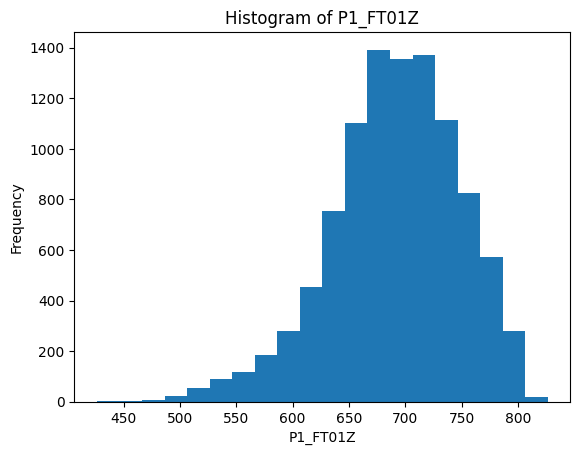

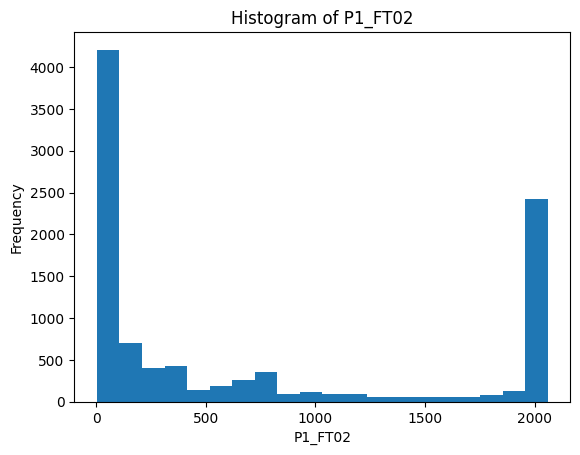

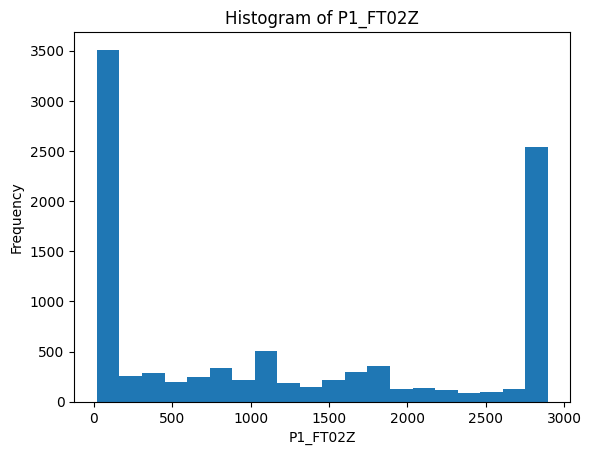

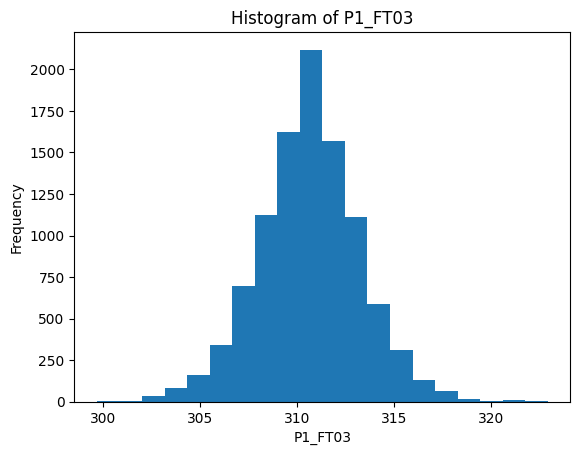

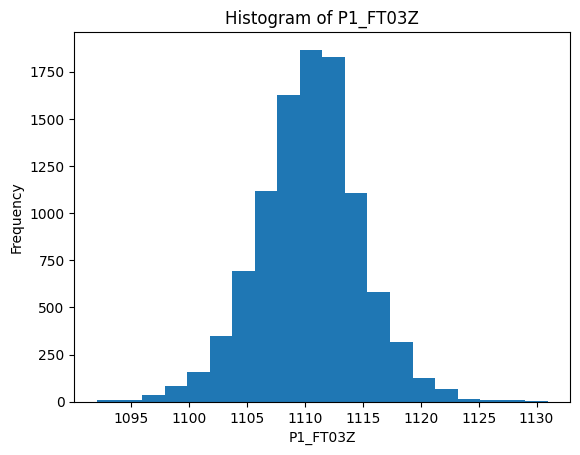

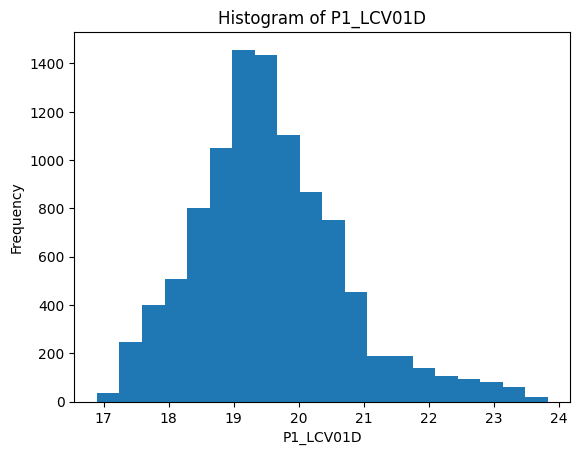

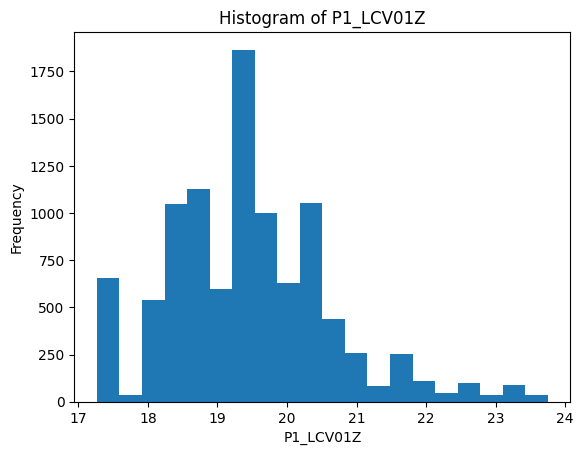

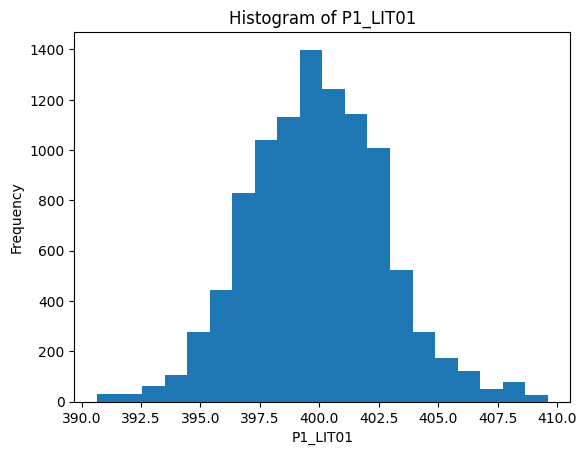

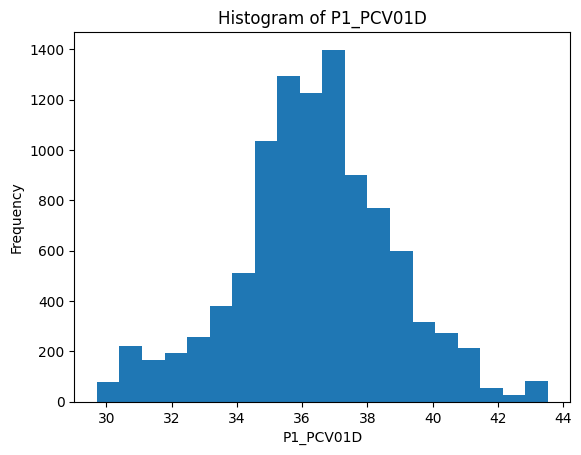

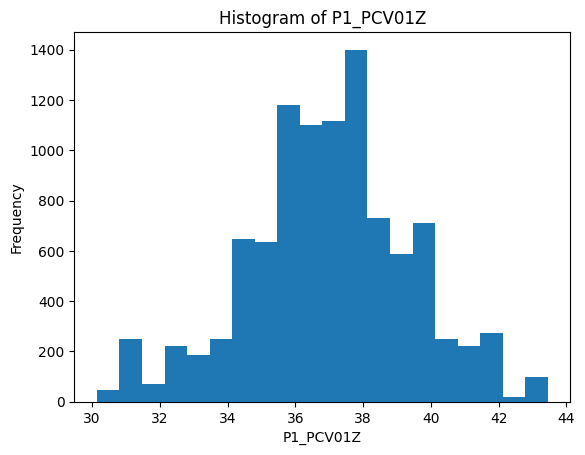

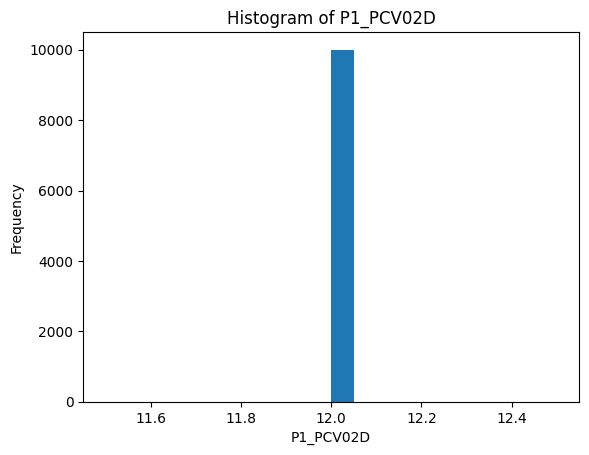

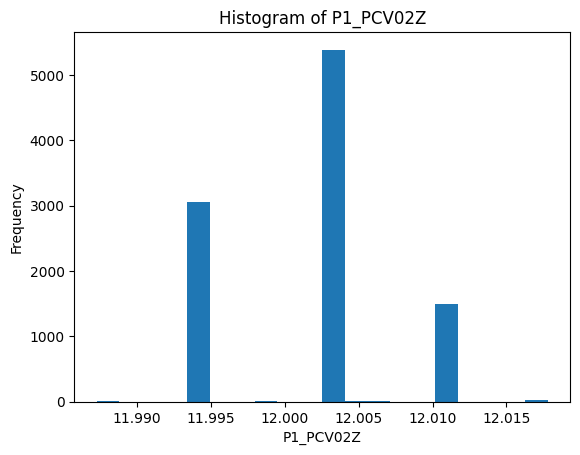

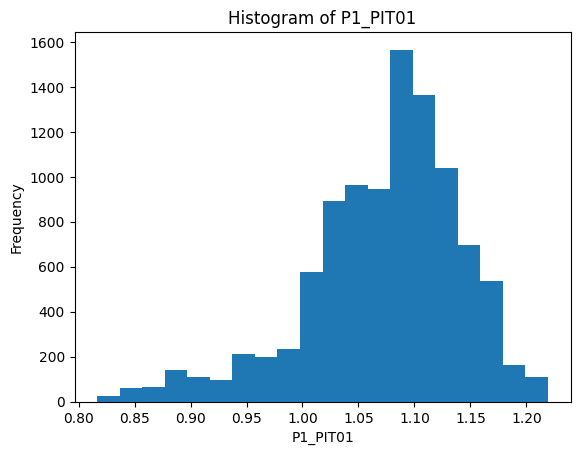

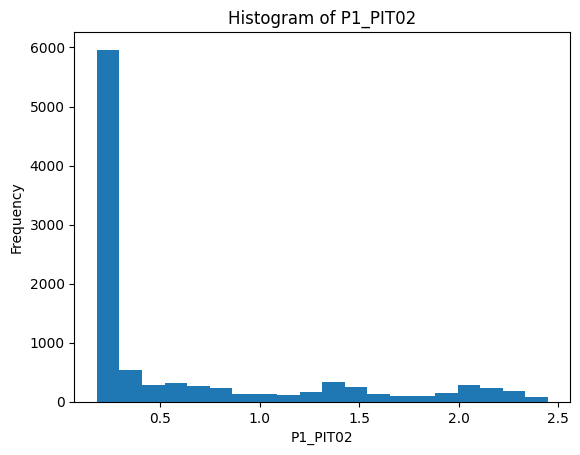

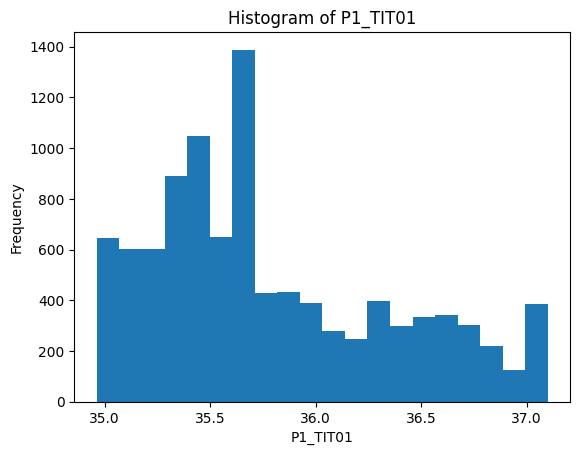

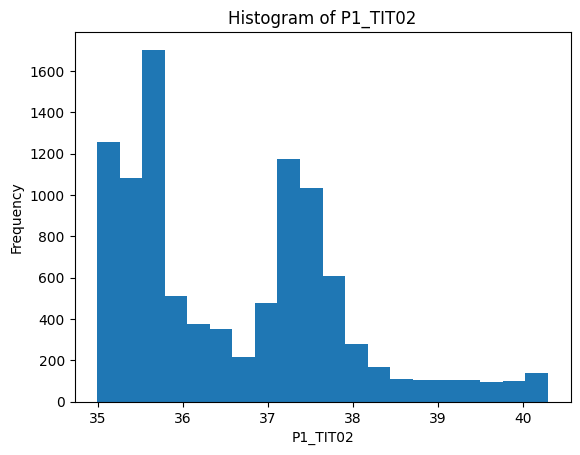

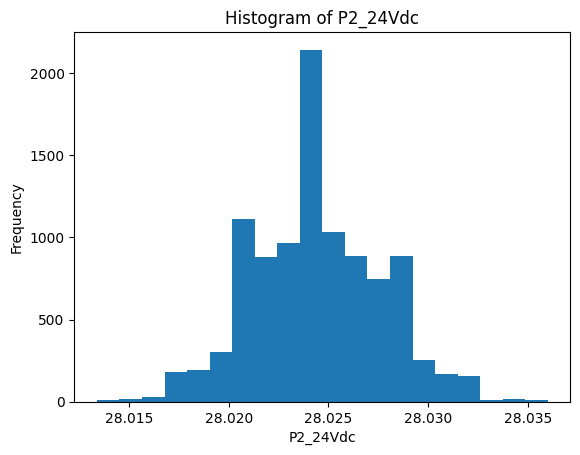

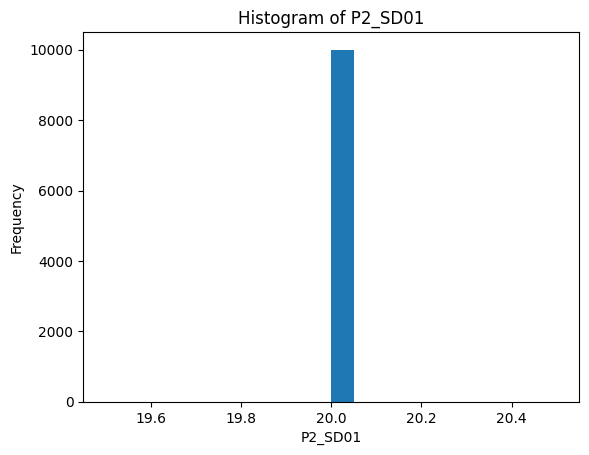

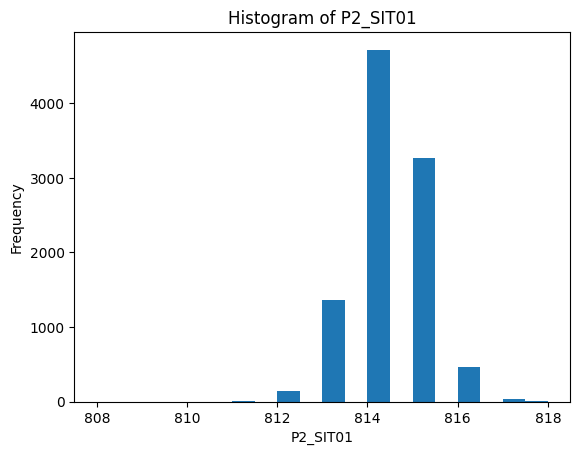

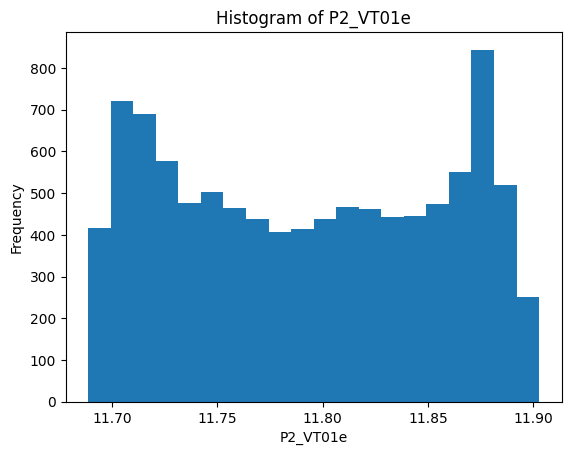

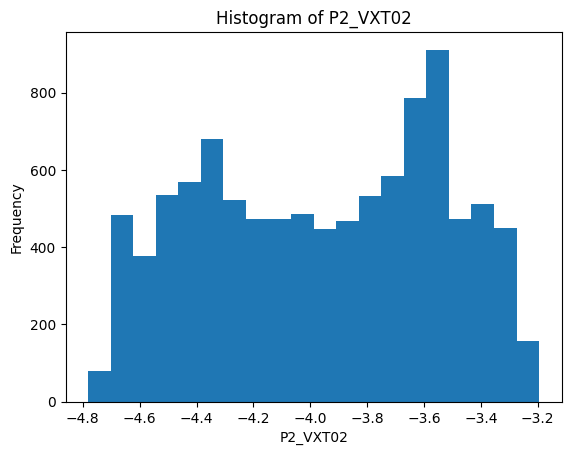

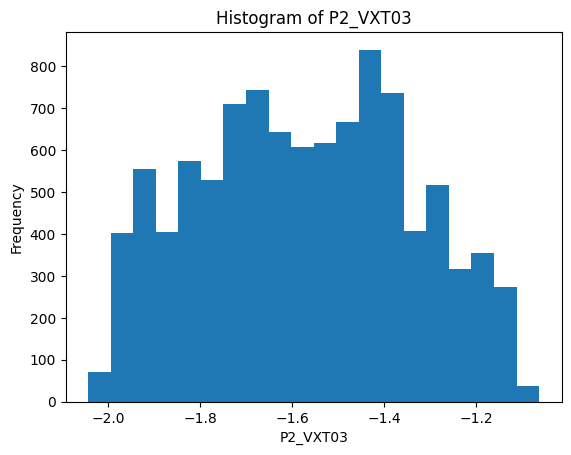

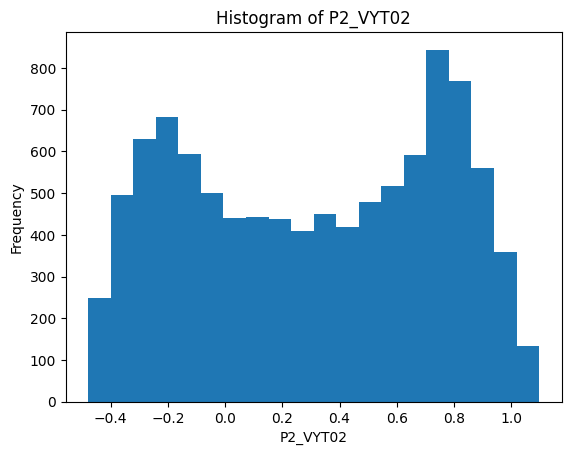

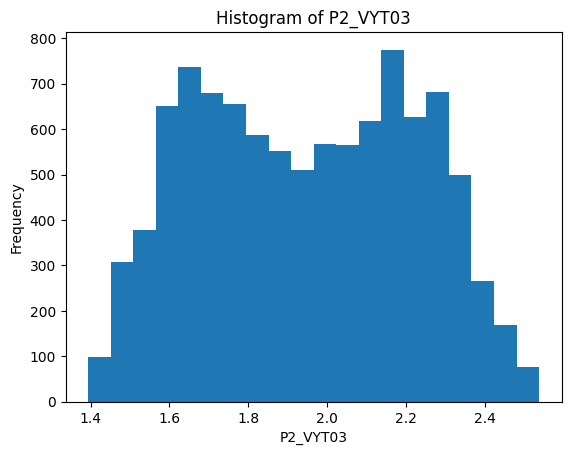

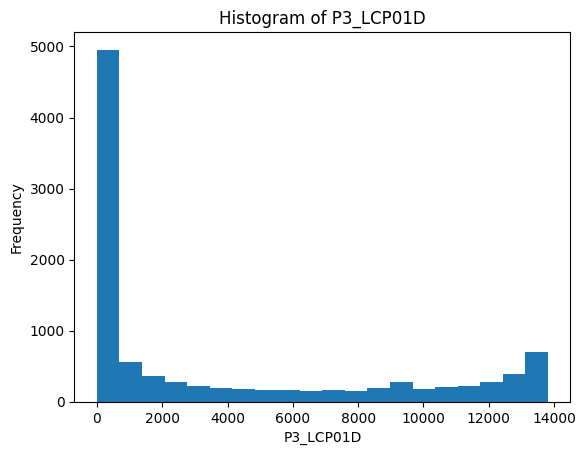

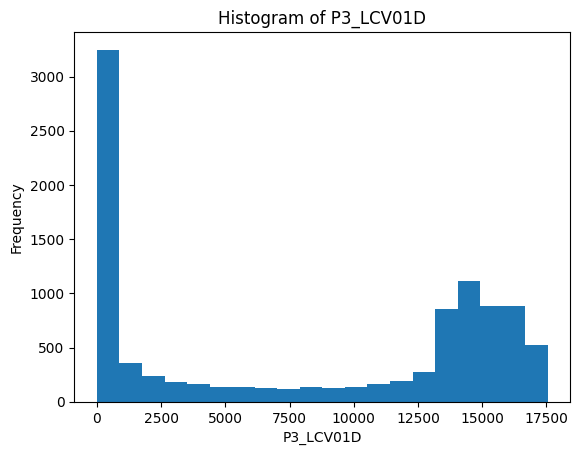

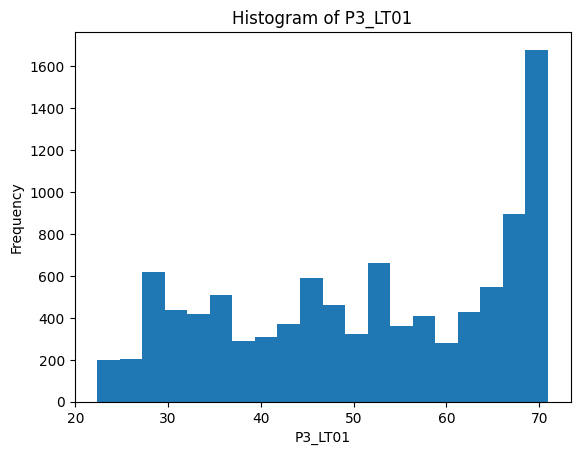

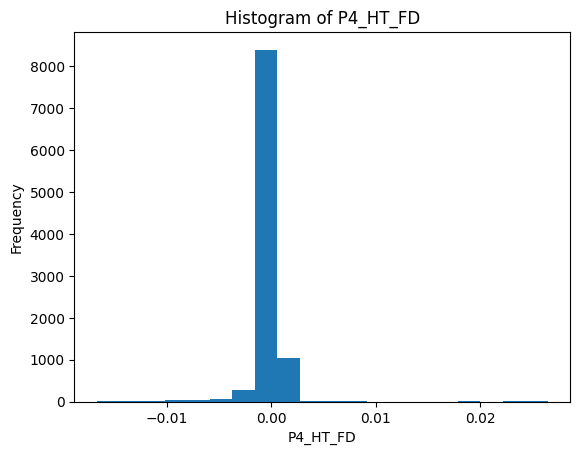

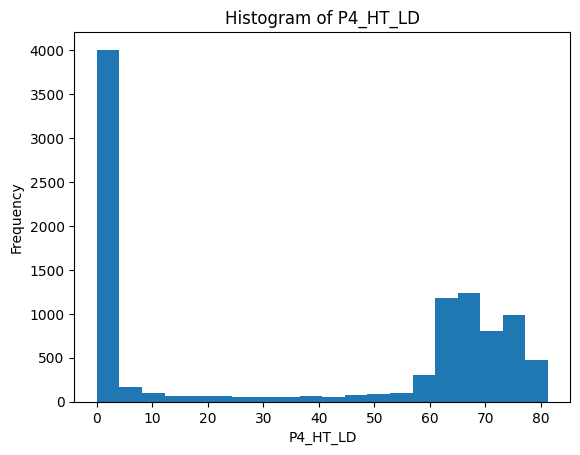

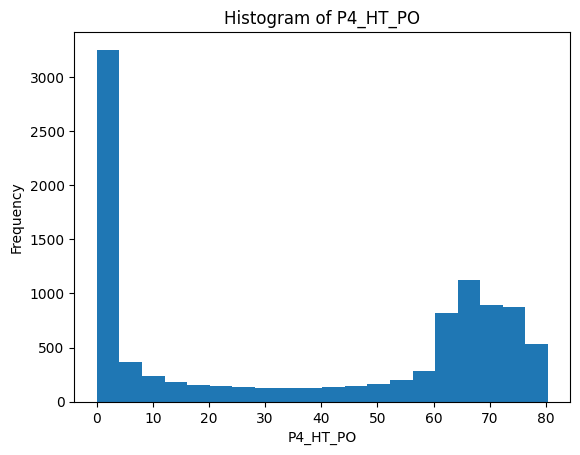

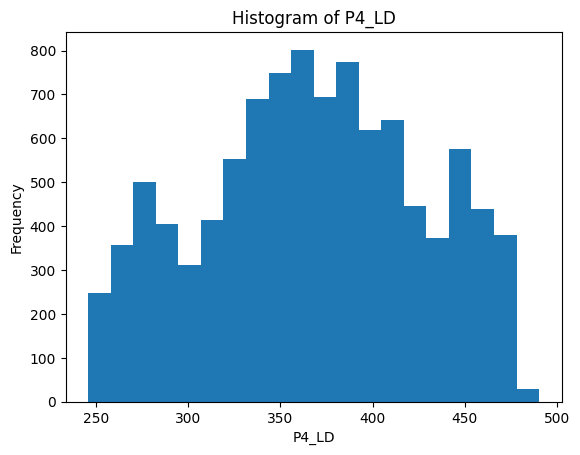

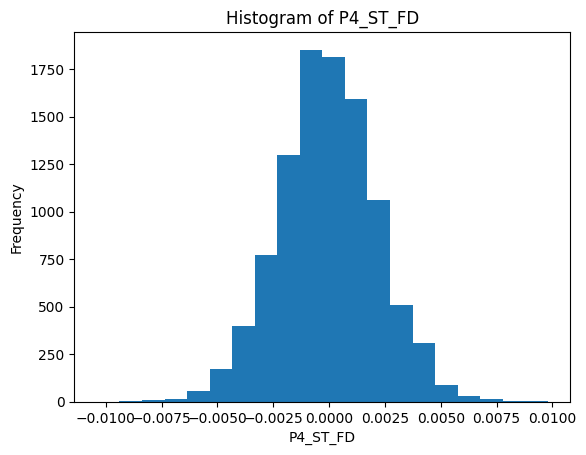

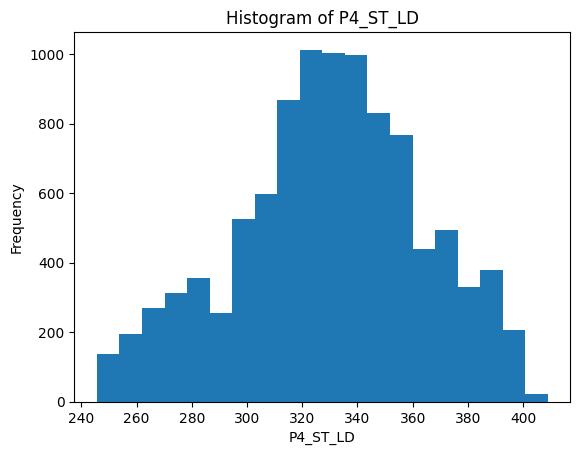

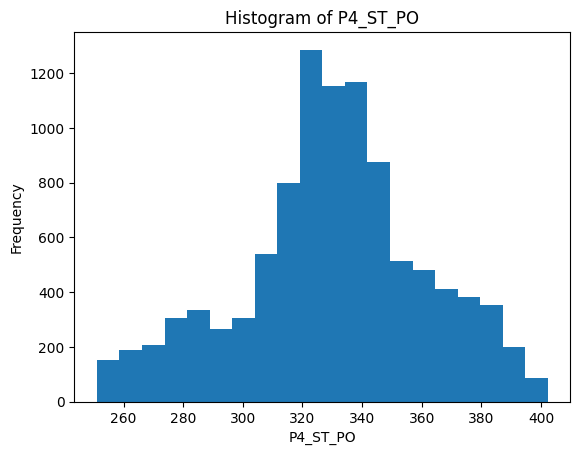

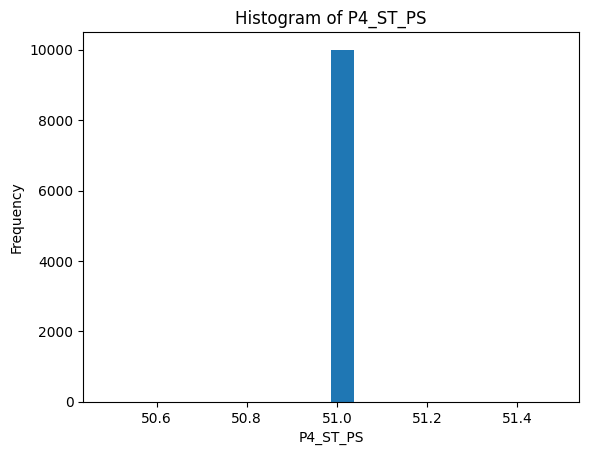

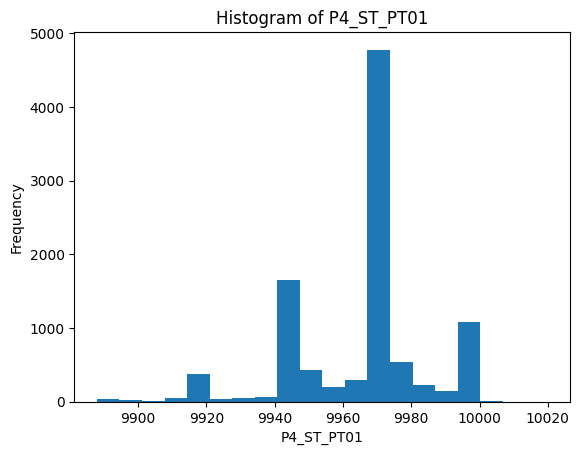

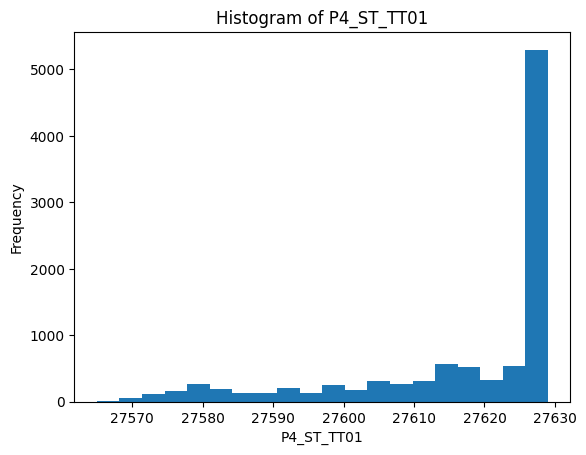

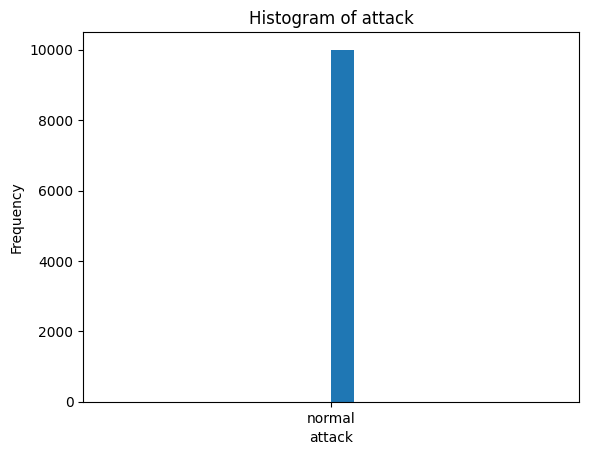

In [ ]:
df_his = df.iloc[:10000,:]

# Loop through each column in the DataFrame
for column in df.columns:
    # Create a histogram plot for the current column
    plt.hist(df_his[column], bins=20)  # Create a histogram with 20 bins
    plt.xlabel(column)  # Set the x-axis label as the column name
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.title(f'Histogram of {column}')  # Set the title of the plot
    plt.show()  # Show the histogram plot

### Standardization

In [ ]:
scaler_std = StandardScaler()
x_n_scaled = scaler_std.fit_transform(x_n)
x_n_an_scaled = scaler_std.fit_transform(x_n_an)
print(x_n_scaled)

[[-2.77555756e-17 -1.67763853e-02 -1.13686838e-13 ... -1.42108547e-14
   3.38273790e-01  7.08482834e-01]
 [-2.77555756e-17 -2.02148256e-02 -1.13686838e-13 ... -1.42108547e-14
   3.38273790e-01  7.08482834e-01]
 [-2.77555756e-17 -1.56302385e-02 -1.13686838e-13 ... -1.42108547e-14
   3.38273790e-01  7.08482834e-01]
 ...
 [-2.77555756e-17  1.17177782e+00 -1.13686838e-13 ... -1.42108547e-14
   3.38273790e-01  7.08482834e-01]
 [-2.77555756e-17  1.11790892e+00 -1.13686838e-13 ... -1.42108547e-14
   3.38273790e-01  7.08482834e-01]
 [-2.77555756e-17  1.09269369e+00 -1.13686838e-13 ... -1.42108547e-14
   3.88471717e-01  7.08482834e-01]]


In [ ]:
x_n_scaled.shape

(20000, 52)

In [ ]:
# Convert ndarray to pandas DataFrame
df_x_n_scaled = pd.DataFrame(x_n_scaled)
df_x_n_an_scaled = pd.DataFrame(x_n_an_scaled)
print(df_x_n_scaled.shape)
print(df_x_n_an_scaled.shape)

(20000, 52)
(20000, 52)


In [ ]:
from scipy.stats import pearsonr
import itertools
import math

# Initialize an empty dictionary to store the Pearson correlation coefficients
pearson_dict = {}

# Compute Pearson correlation coefficients for all pairs of features
for col1, col2 in itertools.combinations(df_x_n_scaled.columns, 2):
    # Compute Pearson correlation coefficient for the current pair of features
    corr, _ = pearsonr(df_x_n_scaled[col1], df_x_n_scaled[col2])
    pearson_dict[f"{col1}-{col2}"] = abs(corr)  # Store the absolute correlation coefficient

# Remove NaN values using a loop
pearson_dict_without_nan = {}
for k, v in pearson_dict.items():
    if not isinstance(v, float) or not math.isnan(v):
        pearson_dict_without_nan[k] = v


# Sort the Pearson correlation coefficients in descending order
sorted_pearson = sorted(pearson_dict_without_nan.items(), key=lambda x: x[1], reverse=True)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
sorted_pearson

[('1-7', 0.999915048495282),
 ('8-9', 0.9993993480481571),
 ('6-17', 0.9992440657226248),
 ('40-44', 0.9989534795670637),
 ('7-48', 0.996729296295024),
 ('1-48', 0.9967041749987294),
 ('5-17', 0.9904606448150092),
 ('5-6', 0.9903201169365693),
 ('16-17', 0.9766853351725886),
 ('6-16', 0.9758375785981269),
 ('40-43', 0.9757227828244537),
 ('5-16', 0.9755710358044885),
 ('23-24', 0.9740353402203414),
 ('43-44', 0.9675595066367209),
 ('9-16', 0.9550664921337748),
 ('8-16', 0.9539227264000625),
 ('27-50', 0.9520072921760107),
 ('47-48', 0.9493838265706591),
 ('5-8', 0.9305918841189388),
 ('5-9', 0.9295508143732282),
 ('20-21', 0.9277964672625708),
 ('7-47', 0.9271320116295698),
 ('1-47', 0.926949131546179),
 ('29-30', 0.923915541945165),
 ('20-27', 0.9155891785202498),
 ('9-17', 0.9141771424795981),
 ('6-8', 0.9137595970762904),
 ('6-9', 0.9135390313884018),
 ('8-17', 0.9135119186307049),
 ('45-48', 0.9124678055231686),
 ('21-27', 0.9120503956145674),
 ('7-45', 0.9049740748565469),
 ('1-45

In [ ]:
# Select feature pairs based on a threshold correlation coefficient
threshold = 0.6  # Set your desired threshold value here
selected_feature_pairs = [(pair.split('-')[0], pair.split('-')[1]) for pair, corr in sorted_pearson if corr >= threshold]

In [ ]:
selected_feature_pairs

[('1', '7'),
 ('8', '9'),
 ('6', '17'),
 ('40', '44'),
 ('7', '48'),
 ('1', '48'),
 ('5', '17'),
 ('5', '6'),
 ('16', '17'),
 ('6', '16'),
 ('40', '43'),
 ('5', '16'),
 ('23', '24'),
 ('43', '44'),
 ('9', '16'),
 ('8', '16'),
 ('27', '50'),
 ('47', '48'),
 ('5', '8'),
 ('5', '9'),
 ('20', '21'),
 ('7', '47'),
 ('1', '47'),
 ('29', '30'),
 ('20', '27'),
 ('9', '17'),
 ('6', '8'),
 ('6', '9'),
 ('8', '17'),
 ('45', '48'),
 ('21', '27'),
 ('7', '45'),
 ('1', '45'),
 ('11', '17'),
 ('6', '11'),
 ('5', '11'),
 ('45', '47'),
 ('43', '45'),
 ('20', '50'),
 ('21', '50'),
 ('10', '11'),
 ('14', '15'),
 ('40', '45'),
 ('44', '45'),
 ('6', '10'),
 ('5', '10'),
 ('10', '17'),
 ('5', '51'),
 ('11', '16'),
 ('8', '51'),
 ('34', '38'),
 ('9', '51'),
 ('35', '36'),
 ('16', '51'),
 ('10', '16'),
 ('17', '51'),
 ('39', '44'),
 ('6', '51'),
 ('39', '40'),
 ('29', '51'),
 ('24', '27'),
 ('8', '11'),
 ('9', '11'),
 ('37', '38'),
 ('30', '51'),
 ('39', '43'),
 ('8', '10'),
 ('1', '23'),
 ('7', '23'),
 ('9',

In [ ]:
# Extract the feature names from the selected feature pairs
selected_features = set([feature for pair in selected_feature_pairs for feature in pair])

In [ ]:
# Convert the selected feature names from strings to numeric format
selected_features_numeric = [float(feature) for feature in selected_features]

# Sort the selected feature names in ascending order
selected_features_numeric.sort()  # To sort in descending order, use selected_features_numeric.sort(reverse=True)

# Filter the DataFrame to keep only the selected features
df_x_n_scaled[selected_features_numeric]

,1,5,6,7,8,9,10,11,14,15,...,38,39,40,43,44,45,47,48,50,51
0,-0.016776,-0.942206,-0.955594,-0.017389,-0.830354,-0.819141,1.006969,1.163432,0.002162,0.349901,...,-0.155995,-0.575215,0.677449,0.818750,0.659946,0.482406,0.042165,-0.018346,0.338274,0.708483
1,-0.020215,-0.942206,-0.954762,-0.019797,-0.830354,-0.819141,1.006969,1.161893,-0.236900,0.016513,...,2.205085,-0.587410,0.698650,0.826622,0.679733,0.538572,0.029097,-0.003746,0.338274,0.708483
2,-0.015630,-0.942206,-0.957256,-0.016014,-0.830354,-0.818938,1.006969,1.161893,0.155843,-0.229138,...,0.027621,-0.598183,0.717642,0.833400,0.704755,0.531164,0.084096,0.009030,0.338274,0.708483
3,0.002708,-0.942206,-0.952268,0.002215,-0.830354,-0.819345,1.006969,1.162064,0.070471,0.174433,...,1.245807,-0.608345,0.735603,0.839960,0.722794,0.544126,0.068305,0.052832,0.338274,0.708483
4,-0.007607,-0.942206,-0.953931,-0.008103,-0.830354,-0.819141,1.006969,1.162064,-0.100292,0.086700,...,1.288781,-0.618711,0.753123,0.848270,0.738507,0.588566,0.117860,0.056479,0.338274,0.708483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.255447,-0.923459,-0.948943,1.255194,-0.830354,-0.819345,1.006969,1.164290,-0.493025,0.262164,...,-1.251297,-0.760988,1.165061,1.096696,1.175541,1.082019,0.864445,1.231827,0.338274,0.708483
19996,1.224501,-0.923308,-0.953099,1.225271,-0.830354,-0.819345,1.006969,1.162577,0.753502,-0.492330,...,1.071070,-0.763021,1.159320,1.083575,1.172049,1.003325,0.786031,1.200189,0.338274,0.708483
19997,1.171778,-0.923355,-0.953099,1.171272,-0.830354,-0.819345,1.006969,1.162748,0.958410,0.788563,...,-1.497066,-0.765663,1.153136,1.072423,1.165649,1.011657,0.766970,1.125970,0.338274,0.708483
19998,1.117909,-0.923045,-0.952268,1.117617,-0.830354,-0.819345,1.006969,1.161893,0.172924,0.999119,...,0.828143,-0.767899,1.146217,1.062801,1.162158,0.992523,0.738653,1.101030,0.338274,0.708483


In [ ]:
print(x_n_scaled)
print(len(x_n_scaled))

[[-2.77555756e-17 -1.67763853e-02 -1.13686838e-13 ... -1.42108547e-14
   3.38273790e-01  7.08482834e-01]
 [-2.77555756e-17 -2.02148256e-02 -1.13686838e-13 ... -1.42108547e-14
   3.38273790e-01  7.08482834e-01]
 [-2.77555756e-17 -1.56302385e-02 -1.13686838e-13 ... -1.42108547e-14
   3.38273790e-01  7.08482834e-01]
 ...
 [-2.77555756e-17  1.17177782e+00 -1.13686838e-13 ... -1.42108547e-14
   3.38273790e-01  7.08482834e-01]
 [-2.77555756e-17  1.11790892e+00 -1.13686838e-13 ... -1.42108547e-14
   3.38273790e-01  7.08482834e-01]
 [-2.77555756e-17  1.09269369e+00 -1.13686838e-13 ... -1.42108547e-14
   3.88471717e-01  7.08482834e-01]]
20000


In [ ]:
x_n_scaled = df_x_n_scaled[selected_features_numeric].values
x_n_an_scaled = df_x_n_an_scaled[selected_features_numeric].values
print(x_n_scaled)
print(len(x_n_scaled))


[[-0.01677639 -0.94220556 -0.9555937  ... -0.01834573  0.33827379
   0.70848283]
 [-0.02021483 -0.94220556 -0.95476217 ... -0.00374613  0.33827379
   0.70848283]
 [-0.01563024 -0.94220556 -0.95725619 ...  0.0090302   0.33827379
   0.70848283]
 ...
 [ 1.17177782 -0.92335483 -0.95309943 ...  1.12597026  0.33827379
   0.70848283]
 [ 1.11790892 -0.9230445  -0.95226823 ...  1.10102983  0.33827379
   0.70848283]
 [ 1.09269369 -0.92331015 -0.95309943 ...  1.06817737  0.38847172
   0.70848283]]
20000


In [ ]:
x_n_scaled.shape

(20000, 35)

### Correlation Probabilistic Model






In [ ]:
window_size = 256
shift = 8

## Create the windowed data

In [ ]:
y_n_an.shape

(20000, 1)

In [ ]:
x_w_train = AD_normal.createSequence(x_n_scaled[:,:], window_size, shift)



In [ ]:
x_w_train_an = AD_normal.createSequence(x_n_an_scaled[:,:], window_size,  shift)

In [ ]:
y_w_train_an = AD_normal.createSequence(y_n_an[:], window_size, shift)

In [ ]:
x_w_train.shape

(2467, 256, 35)

In [ ]:
x_w_train_an.shape

(2467, 256, 35)

### Calculate correlation

#### normal part

In [ ]:
# %cd '/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/SWaT/pearson/w256_s8/training/'



%cd '/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/HAI_HIL/pearson/HAI_W128/training/'

/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/HAI_HIL/pearson/HAI_W128/training


In [ ]:
LCVs = []
LCVs = AD_normal.calculateLCV(x_w_train[:50000,:,:])

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 



In [ ]:
# Open a file for writing
with open('LCVs_1.pickle', 'wb') as f:
    # Serialize the list variable to the file using pickle.dump()
    pickle.dump(LCVs, f)

In [ ]:
LCVs = []
LCVs = AD_normal.calculateLCV(x_w_train[50000:,:,:])

In [ ]:
# Open a file for writing
with open('LCVs_2.pickle', 'wb') as f:
    # Serialize the list variable to the file using pickle.dump()
    pickle.dump(LCVs, f)

In [ ]:
#del x_w_train

Load LCVs partitions

In [ ]:
# Load the pickle file
with open('LCVs_1.pickle', 'rb') as f:
    sample_normal_1 = pickle.load(f)

In [ ]:
# Load the pickle file
with open('LCVs_2.pickle', 'rb') as f:
    sample_normal_2 = pickle.load(f)

In [ ]:
LCVs = sample_normal_1 + sample_normal_2 #+ sample_normal_3 #+ sample_normal_4 + sample_normal_5 #+ sample_normal_6

In [ ]:
import gc

# ... code that creates objects ...
# del LCVs
del sample_normal_1, sample_normal_2#, sample_normal_3
# del sample_normal_4, sample_normal_5 , sample_normal_6

# Trigger garbage collection
gc.collect()

63423

In [ ]:
len(LCVs)

2467

#### anomaly part

In [ ]:
# %cd '/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/SWaT/pearson/w256_s8/testing/'

%cd '/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/HAI_HIL/pearson/HAI_W256/testing/'

/content/drive/My Drive/Colab Notebooks/Thesis/LCVs_all/HAI_HIL/pearson/HAI_W256/testing


In [ ]:
# del x_w_train, LCVs

In [ ]:
LCVs_an_y = AD_normal.getLabels(y_w_train_an[:,:,:])

In [ ]:
df_LCVs_an_y = pd.DataFrame(LCVs_an_y)

In [ ]:
df_LCVs_an_y.value_counts()

0    2170
1     297
dtype: int64

In [ ]:
# df_LCVs_an_y.value_counts()

In [ ]:
# Open a file for writing
with open('LCVs_an_y.pickle', 'wb') as f:
    # Serialize the list variable to the file using pickle.dump()
    pickle.dump(LCVs_an_y, f)

In [ ]:
LCVs_an = []
LCVs_an = AD_normal.calculateLCV(x_w_train_an[:50000,:,:])

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 



In [ ]:
# Open a file for writing
with open('LCVs_an_1.pickle', 'wb') as f:
    # Serialize the list variable to the file using pickle.dump()
    pickle.dump(LCVs_an, f)

In [ ]:
LCVs_an = []
LCVs_an = AD_normal.calculateLCV(x_w_train_an[50000:,:,:])

In [ ]:
# Open a file for writing
with open('LCVs_an_2.pickle', 'wb') as f:
    # Serialize the list variable to the file using pickle.dump()
    pickle.dump(LCVs_an, f)

Load LCVs with attack partitions

In [ ]:
# Load the pickle file
with open('LCVs_an_y.pickle', 'rb') as f:
    LCVs_an_y = pickle.load(f)

In [ ]:
# Load the pickle file
with open('LCVs_an_1.pickle', 'rb') as f:
    sample_attack_1 = pickle.load(f)

In [ ]:
# Load the pickle file
with open('LCVs_an_2.pickle', 'rb') as f:
    sample_attack_2 = pickle.load(f)

In [ ]:
LCVs_an = sample_attack_1 + sample_attack_2 #+ sample_attack_3

In [ ]:
import gc

# ... code that creates objects ...
del sample_attack_1, sample_attack_2

# Trigger garbage collection
gc.collect()

0

In [ ]:
len(LCVs_an)

2467

In [ ]:
pd.Series(LCVs_an_y).value_counts()

0    2170
1     297
dtype: int64

#### Split Validation and Testing data

In [ ]:
from sklearn.model_selection import train_test_split


# Splitting the data into training and testing sets with stratified sampling
X_test, X_valid, y_test, y_valid = train_test_split(LCVs_an, LCVs_an_y, train_size=0.5, stratify=LCVs_an_y, random_state=42)

#### Calculate the mean and covariance matrix of all LCVs

In [ ]:
# Compute the mean and covariance matrix of the windowed data
mean_vector = np.mean(LCVs, axis=0)
covariance_matrix = np.cov(LCVs, rowvar=False)

#### Define the multivariate Gaussian distribution with the mean and covariance


In [ ]:
print(AD_normal.checkPosDef(covariance_matrix))

True


In [ ]:
# Regularization parameter (adjust as needed)
epsilon = 1e-3
cov_matrix_reg = covariance_matrix + epsilon * np.identity(covariance_matrix.shape[0])

In [ ]:
# Define the multivariate Gaussian distribution with the mean and covariance
# mvn = AD_normal.MGD(mean_vector, covariance_matrix)

# Define the multivariate Gaussian distribution with the mean and covariance
mvn = AD_normal.MGD(mean_vector, cov_matrix_reg)

In [ ]:
# Compute the log-likelihood of the data given the estimated mean and covariance
log_likelihood = np.sum(mvn.logpdf(LCVs))

## Finding anomaly


### predict with Epsilon

In [ ]:
# !! crashed
pdf_an = mvn.logpdf(X_valid)
pdf_an

array([  578.55782606,   120.51150676, -1349.27424969, ...,
         537.78462011,   710.89235036,   218.64812664])

In [ ]:
best_f1, best_epsilon, cm = AD_normal.select_threshold(pdf_an, y_valid)

In [ ]:
#
print(best_epsilon)

511.8041567176442


In [ ]:
pdf_an_ = mvn.logpdf(X_test)
pdf_an_

array([ 10.33532114, 649.85883731, 603.91557981, ..., 437.56303928,
       811.89757385, 411.36648192])

In [ ]:
# confusion matrix
predictions = (pdf_an_ < best_epsilon)
cm = confusion_matrix(y_test, predictions)

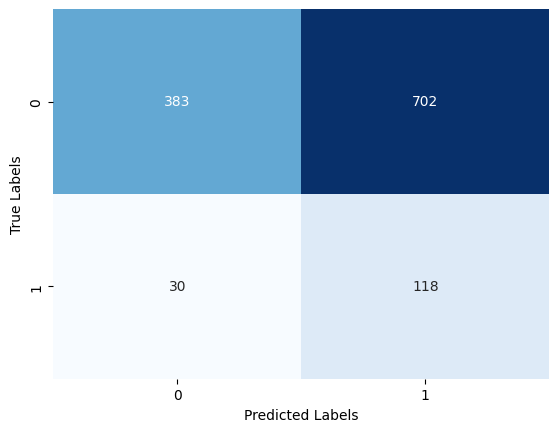

In [ ]:
# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Check the model performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.35      0.51      1085
           1       0.14      0.80      0.24       148

    accuracy                           0.41      1233
   macro avg       0.54      0.58      0.38      1233
weighted avg       0.83      0.41      0.48      1233



### predict with Alpha

In [ ]:
best_f1, best_alpha, cm  = AD_normal.findBestAlpha(X_valid, y_valid,covariance_matrix, mean_vector)

In [ ]:
best_alpha

0

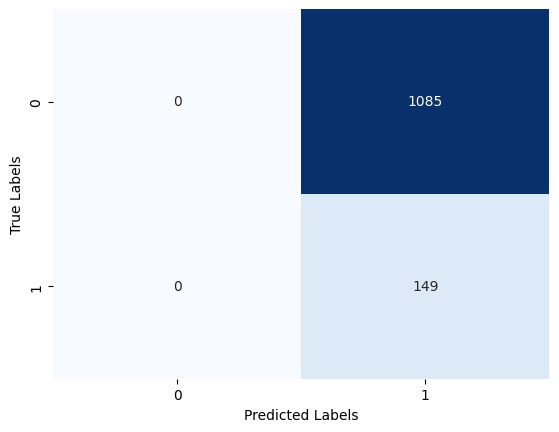

In [ ]:
# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
y_pred = AD_normal.predictWithAlpha(LCVs_an, covariance_matrix, mean_vector, best_alpha)

In [ ]:
cm = confusion_matrix(LCVs_an_y, y_pred)

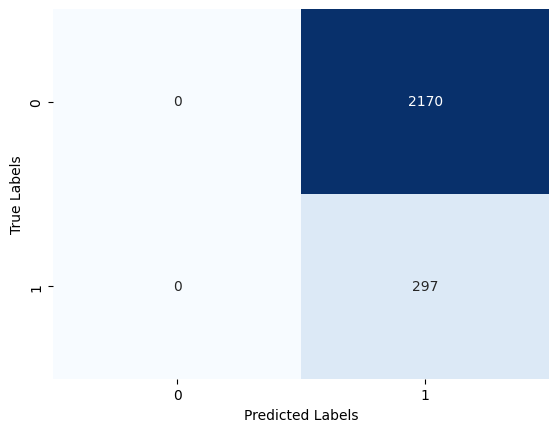

In [ ]:
# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
pd.Series(LCVs_an_y).value_counts()

0    2170
1     297
dtype: int64

In [ ]:
pd.Series(y_pred).value_counts()

1    2467
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
# Check the model performance
print(classification_report(LCVs_an_y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2170
           1       0.12      1.00      0.21       297

    accuracy                           0.12      2467
   macro avg       0.06      0.50      0.11      2467
weighted avg       0.01      0.12      0.03      2467



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualization

In [ ]:
LCVs_an_pdf = mvn.logpdf(LCVs_an)


### predict with Alpha

In [ ]:
# LCVs_an, LCVs_an_y
LCVs_an_pred  = AD_normal.predictWithAlpha(LCVs_an, covariance_matrix, mean_vector, best_alpha)

In [ ]:
LCVs_an_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


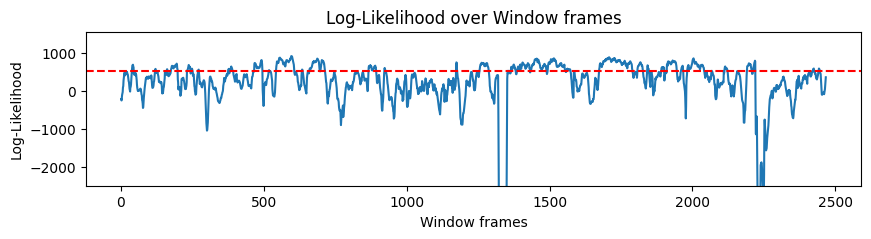

In [ ]:
# Define the range of parameter values to test
size = len(LCVs_an_pdf)
parameter_range = np.linspace(1, size, size)

plt.figure(figsize=(10, 2))
plt.plot(parameter_range, LCVs_an_pdf)
plt.xlabel('Window frames')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood over Window frames')
# Add a constant line at y = -2000
plt.axhline(y=best_epsilon, color='r', linestyle='--')
plt.ylim([-2500, None])
plt.show()

### Explainable AI (XAI)  model  



In [ ]:
! pip install shap
! pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=fde716752653f20440997f3617ca1100d56589eed058f2fb071c23e02eef868d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
LCVs_an_feature = pd.DataFrame(LCVs_an)
LCVs_an_y =pd.DataFrame(LCVs_an_y)

In [ ]:
print(LCVs_an_feature.shape)
print(LCVs_an_y.shape)


(2467, 595)
(2467, 1)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.covariance import EmpiricalCovariance
from sklearn.model_selection import train_test_split
import shap

# Generate synthetic data with 5 features
# np.random.seed(42)
# data = np.random.randn(1000, 5)
# df = pd.DataFrame(data, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5'])

# # Create a target variable as a linear combination of features
# df['Target'] = 2 * df['Feature_1'] + 3 * df['Feature_2'] + 1.5 * df['Feature_3'] + np.random.normal(0, 1, len(df))

# # Split data into training and testing sets
# X = df.drop('Target', axis=1)
# y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(LCVs_an, LCVs_an_y, test_size=0.2, random_state=42)

# Fit the Gaussian distribution model using EmpiricalCovariance
gaussian_model = EmpiricalCovariance().fit(X_train)

# Calculate the covariance matrix
cov_matrix = gaussian_model.covariance_

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

# Calculate the mean vector
mean_vector = np.mean(X_train, axis=0)

# Print the mean vector
print("\nMean Vector:")
print(mean_vector)

# Feature importance analysis using SHAP
explainer = shap.Explainer(gaussian_model.decision_function, X_train)
shap_values = explainer(X_test)

# Plot summary plot for feature importance
shap.summary_plot(shap_values, X_test)


Covariance Matrix:
[[ 1.06505645e-01  4.77987684e-02  2.80789646e-03 ...  2.16110513e-03
  -6.95038122e-03 -8.19385480e-04]
 [ 4.77987684e-02  5.98415808e-02 -8.79786053e-04 ...  3.28919695e-03
   8.89398604e-06  1.96248878e-04]
 [ 2.80789646e-03 -8.79786053e-04  1.84729175e-02 ... -4.93472367e-03
  -1.32642393e-04  1.53667211e-03]
 ...
 [ 2.16110513e-03  3.28919695e-03 -4.93472367e-03 ...  6.63260751e-02
  -7.64228241e-04  3.12794316e-03]
 [-6.95038122e-03  8.89398604e-06 -1.32642393e-04 ... -7.64228241e-04
   5.79545676e-02 -3.12948532e-03]
 [-8.19385480e-04  1.96248878e-04  1.53667211e-03 ...  3.12794316e-03
  -3.12948532e-03  3.02271646e-02]]

Mean Vector:
[ 1.31249895e-01  2.16323335e-02  9.79116608e-01  1.20362866e-02
  4.36139574e-04  2.52901600e-03 -6.37825431e-03  3.13782837e-02
  2.77831723e-02  2.40206148e-02  2.29610315e-02 -2.05132844e-03
 -2.22350246e-03  3.75067659e-02  1.48288417e-02  2.16559318e-01
  6.93421730e-02 -9.78722044e-04  9.05058843e-03 -2.07810310e-03
 -8.31

AttributeError: ignored

In [ ]:
# Remove column name 'A'
df.head(2)

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32,0.0,28.9981,35.7395,0.0,...,64.4604,57.8704,395.0195,-0.0004,330.6568,328.9388,50.9871,9973,27629,normal
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32,0.0,29.9914,35.7388,0.0,...,64.7208,58.4853,398.3109,-0.0012,330.2228,329.3728,50.9871,9973,27629,normal


In [ ]:
# ! pip install shap matplotlib
df=df.drop('time',axis=1)

In [ ]:
df.head(3)

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,0.0983,1.0702,399.2321,1110.3986,32,0.0,28.9981,35.7395,0.0,0.2838,...,64.4604,57.8704,395.0195,-0.0004,330.6568,328.9388,50.9871,9973,27629,normal
1,0.0983,1.0699,399.2321,1110.3986,32,0.0,29.9914,35.7388,0.0,0.2838,...,64.7208,58.4853,398.3109,-0.0012,330.2228,329.3728,50.9871,9973,27629,normal
2,0.0983,1.0703,399.2321,1110.3986,32,0.0,27.0122,35.7399,0.0,0.2914,...,64.9450,59.2629,397.8768,0.0018,332.0493,329.7526,50.9871,9973,27629,normal


Covariance Matrix:
[[ 7.70371978e-34  3.17662885e-33  3.15544362e-30 ...  3.94430453e-31
   8.48183245e-30  1.61558713e-29]
 [ 3.17662885e-33  7.60345959e-03  1.30114718e-29 ...  1.62643397e-30
   5.38880618e-01 -1.04010862e-01]
 [ 3.15544362e-30  1.30114718e-29  1.29246971e-26 ...  1.61558713e-27
   3.47415857e-26  6.61744490e-26]
 ...
 [ 3.94430453e-31  1.62643397e-30  1.61558713e-27 ...  2.01948392e-28
   4.34269822e-27  8.27180613e-27]
 [ 8.48183245e-30  5.38880618e-01  3.47415857e-26 ...  4.34269822e-27
   3.99421927e+02 -3.80344287e+01]
 [ 1.61558713e-29 -1.04010862e-01  6.61744490e-26 ...  8.27180613e-27
  -3.80344287e+01  2.63716921e+02]]

Mean Vector:
P1_B2004          0.098300
P1_B2016          1.071195
P1_B3004        399.232100
P1_B3005       1110.398600
P1_B4002         32.000000
P1_B4005         37.841534
P1_B400B       1166.954962
P1_B4022         35.742989
P1_FCV01D        30.902875
P1_FCV01Z        30.857180
P1_FCV02D        50.499688
P1_FCV02Z        43.910282
P1_FCV0

PermutationExplainer explainer: 4001it [07:03,  9.28it/s]


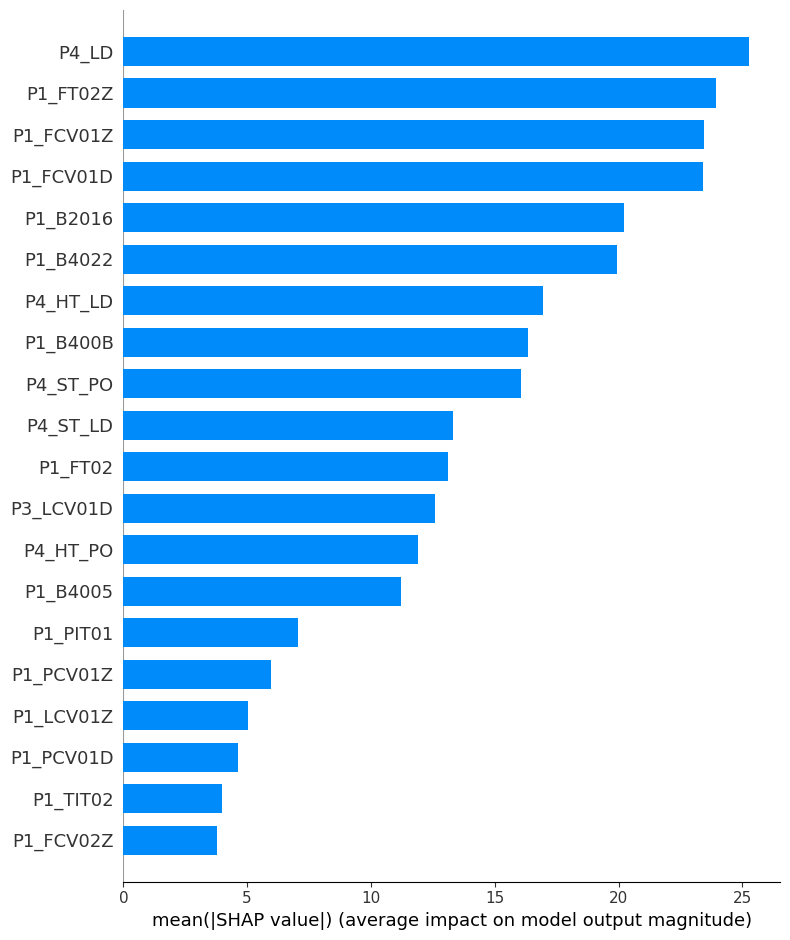

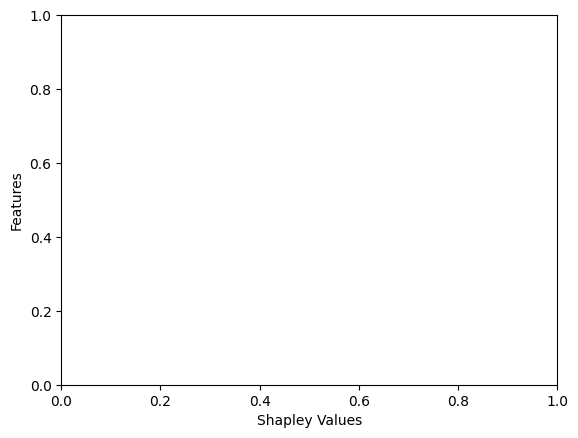

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.covariance import EmpiricalCovariance
import shap
import matplotlib.pyplot as plt2

# Generate synthetic data with 5 features
#X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# Create a pandas DataFrame
#data = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5'])
# data=df
# data['Normal/Attack'] = y


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('attack', axis=1), df['attack'], test_size=0.2, random_state=42)

# Fit the Multivariate Gaussian Distribution model using EmpiricalCovariance
mgd_model = EmpiricalCovariance().fit(X_train)

# Calculate the covariance matrix
cov_matrix = mgd_model.covariance_

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

# Calculate the mean vector
mean_vector = np.mean(X_train, axis=0)

# Print the mean vector
print("\nMean Vector:")
print(mean_vector)

# Feature importance analysis using SHAP
explainer = shap.Explainer(mgd_model.mahalanobis, X_train)
shap_values = explainer(X_test)

# Plot summary plot for feature importance
shap.summary_plot(shap_values, X_test,plot_type="bar")


# Customize X-axis and Y-axis labels
plt2.xlabel('Shapley Values')
plt2.ylabel('Features')

# Show the plot
plt2.show()

# naming of x-axis and y-axis
#plt.xlabel("Features")
#plt.ylabel("Value")

# naming the title of the plot
#plt.title("Feature importance detail ")
